# Locate P, Q, S and T waves in ECG

This example shows how to use Neurokit to delineate the ECG peaks in Python using NeuroKit. This means detecting and locating all components of the QRS complex, including **P-peaks** and **T-peaks**, as well their **onsets** and **offsets** from an ECG signal.

This example can be referenced by [citing the package](https://github.com/neuropsychology/NeuroKit#citation).

In [1]:
# Load NeuroKit and other useful packages
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 5]  # Bigger images

In this example, we will use a short segment of ECG signal with sampling rate of 3000 Hz. 

## Find the R peaks

In [2]:
# Retrieve ECG data from data folder (sampling rate= 1000 Hz)
ecg_signal = nk.data(dataset="ecg_3000hz")['ECG']
# Extract R-peaks locations
_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=3000)

The [ecg_peaks()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.ecg_peaks>) function will return a dictionary contains the samples at which R-peaks are located. 

Let's visualize the R-peaks location in the signal to make sure it got detected correctly.

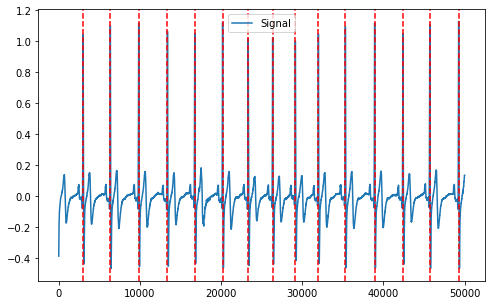

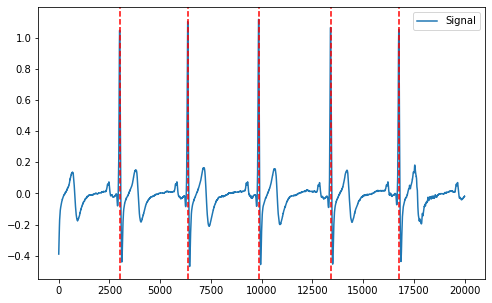

In [3]:
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], ecg_signal)

# Zooming into the first 5 R-peaks
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:5], ecg_signal[:20000])

Visually, the R-peaks seem to have been correctly identified. You can also explore searching for R-peaks using different methods provided by Neurokit [ecg_peaks()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.ecg_peaks>).

## Locate other waves (P, Q, S, T) and their onset and offset

In [ecg_delineate()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.ecg_delineate>), Neurokit implements different methods to segment the QRS complexes. There are the derivative method and the other methods that make use of Wavelet to delineate the complexes. 

### Peak method

First, let's take a look at the 'peak' method and its output.

In [4]:
# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=3000, method="peak")

/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(buffer, ignore_index=True, sort=False)
/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = buffer.append(data, ignore_index=True, sort=False)


count     50000.000000
unique     4598.000000
top           0.010681
freq        573.000000
Name: Signal, dtype: float64
{'epoch': count     2802.000000
unique    1263.000000
top          0.003204
freq        52.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1316.000000
top          0.010681
freq        93.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1299.000000
top          0.008087
freq        54.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1233.000000
top          0.013123
freq        68.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1300.000000
top          0.015564
freq        59.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1352.000000
top          0.013123
freq        44.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1218.000000
top          0.005646
freq        32.000000
Name: Signal,

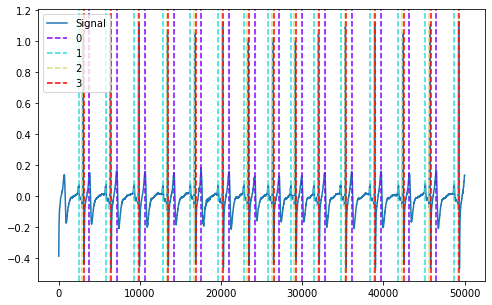

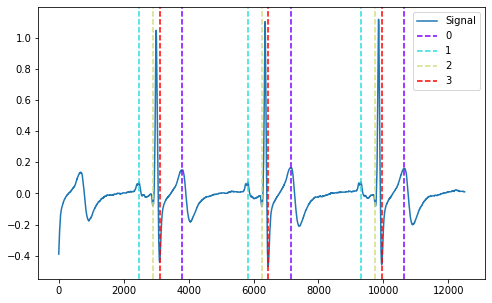

In [5]:
# Visualize the T-peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'], 
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], ecg_signal)

# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3], 
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]], ecg_signal[:12500])


Visually, the 'peak' method seems to have correctly identified the P-peaks, Q-peaks, S-peaks and T-peaks for this signal, at least, for the first few complexes. Well done, *peak*!

However, it can be quite tiring to be zooming in to each complex and inspect them one by one. To have a better overview of all complexes at once, you can make use of the `show` argument in [ecg_delineate()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.ecg_delineate>) as below.

/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(buffer, ignore_index=True, sort=False)
/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = buffer.append(data, ignore_index=True, sort=False)


count     50000.000000
unique     4598.000000
top           0.010681
freq        573.000000
Name: Signal, dtype: float64
{'epoch': count     2802.000000
unique    1263.000000
top          0.003204
freq        52.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1316.000000
top          0.010681
freq        93.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1299.000000
top          0.008087
freq        54.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1233.000000
top          0.013123
freq        68.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1300.000000
top          0.015564
freq        59.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1352.000000
top          0.013123
freq        44.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1218.000000
top          0.005646
freq        32.000000
Name: Signal,

/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(buffer, ignore_index=True, sort=False)
/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = buffer.append(data, ignore_index=True, sort=False)


{'epoch': count     2700.000000
unique    1299.000000
top          0.010681
freq        43.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1226.000000
top          0.013123
freq        65.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1295.000000
top          0.015564
freq        56.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1348.000000
top          0.013123
freq        44.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1206.000000
top          0.005646
freq        32.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1201.000000
top          0.005798
freq        38.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1192.000000
top         -0.011292
freq        59.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1284.000000
top          0.005646
freq        39.000000
Name: 

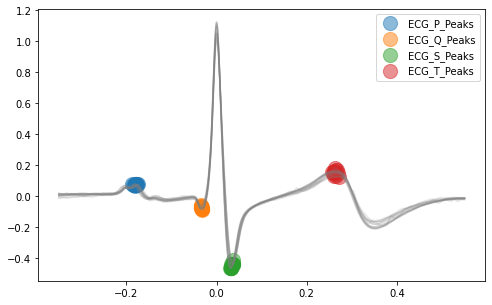

In [6]:
# Delineate the ECG signal and visualizing all peaks of ECG complexes
_, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=3000, method="peak", show=True, show_type='peaks')

The 'peak' method is doing a glamorous job with identifying all the ECG peaks for this piece of ECG signal.

On top of the above peaks, the peak method also identify the wave boundaries, namely the onset of P-peaks and offset of T-peaks. You can vary the argument `show_type` to specify the information you would like plot.

Let's visualize them below:

/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(buffer, ignore_index=True, sort=False)
/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = buffer.append(data, ignore_index=True, sort=False)


count     50000.000000
unique     4598.000000
top           0.010681
freq        573.000000
Name: Signal, dtype: float64
{'epoch': count     2802.000000
unique    1263.000000
top          0.003204
freq        52.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1316.000000
top          0.010681
freq        93.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1299.000000
top          0.008087
freq        54.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1233.000000
top          0.013123
freq        68.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1300.000000
top          0.015564
freq        59.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1352.000000
top          0.013123
freq        44.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1218.000000
top          0.005646
freq        32.000000
Name: Signal,

/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(buffer, ignore_index=True, sort=False)
/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = buffer.append(data, ignore_index=True, sort=False)


{'epoch': count     2700.000000
unique    1295.000000
top          0.015564
freq        56.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1348.000000
top          0.013123
freq        44.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1206.000000
top          0.005646
freq        32.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1201.000000
top          0.005798
freq        38.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1192.000000
top         -0.011292
freq        59.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1284.000000
top          0.005646
freq        39.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1287.000000
top          0.010681
freq        54.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1299.000000
top          0.010681
freq        58.000000
Name: 

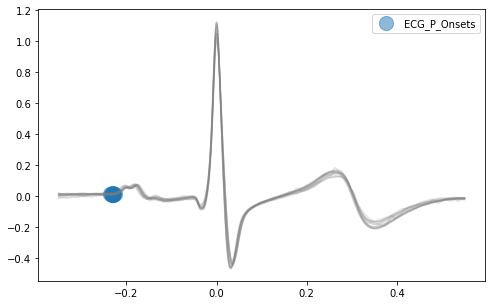

In [7]:
# Delineate the ECG signal and visualizing all P-peaks boundaries
signal_peak, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=3000, method="peak", show=True, show_type='bounds_P')

/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(buffer, ignore_index=True, sort=False)
/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = buffer.append(data, ignore_index=True, sort=False)


count     50000.000000
unique     4598.000000
top           0.010681
freq        573.000000
Name: Signal, dtype: float64
{'epoch': count     2802.000000
unique    1263.000000
top          0.003204
freq        52.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1316.000000
top          0.010681
freq        93.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1299.000000
top          0.008087
freq        54.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1233.000000
top          0.013123
freq        68.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1300.000000
top          0.015564
freq        59.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1352.000000
top          0.013123
freq        44.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1218.000000
top          0.005646
freq        32.000000
Name: Signal,

/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(buffer, ignore_index=True, sort=False)
/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = buffer.append(data, ignore_index=True, sort=False)


{'epoch': count     2700.000000
unique    1226.000000
top          0.013123
freq        65.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1295.000000
top          0.015564
freq        56.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1348.000000
top          0.013123
freq        44.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1206.000000
top          0.005646
freq        32.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1201.000000
top          0.005798
freq        38.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1192.000000
top         -0.011292
freq        59.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1284.000000
top          0.005646
freq        39.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1287.000000
top          0.010681
freq        54.000000
Name: 

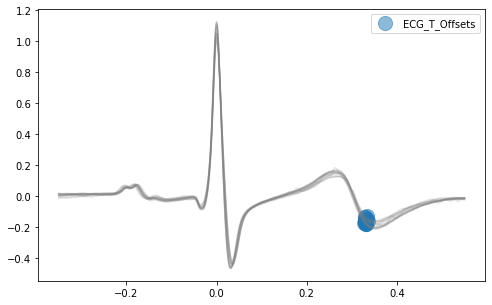

In [8]:
# Delineate the ECG signal and visualizing all T-peaks boundaries
signal_peaj, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=3000, method="peak", show=True, show_type='bounds_T')

Both the onsets of P-peaks and the offsets of T-peaks appears to have been correctly identified here. This information will be used to delineate cardiac phases in [ecg_phase()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.ecg_phase>).

Let's next take a look at the continuous wavelet method.

### Continuous Wavelet Method (CWT)

In [9]:
rpeaks

{'ECG_R_Peaks': array([ 3000,  6355,  9851, 13396, 16757, 20188, 23343, 26356, 29150,
        31990, 35314, 38921, 42407, 45714, 49272]),
 'sampling_rate': 3000}

/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(buffer, ignore_index=True, sort=False)
/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = buffer.append(data, ignore_index=True, sort=False)


count     50000.000000
unique     4598.000000
top           0.010681
freq        573.000000
Name: Signal, dtype: float64
{'epoch': count     2802.000000
unique    1263.000000
top          0.003204
freq        52.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1316.000000
top          0.010681
freq        93.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1299.000000
top          0.008087
freq        54.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1233.000000
top          0.013123
freq        68.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1300.000000
top          0.015564
freq        59.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1352.000000
top          0.013123
freq        44.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1218.000000
top          0.005646
freq        32.000000
Name: Signal,

/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(buffer, ignore_index=True, sort=False)
/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = buffer.append(data, ignore_index=True, sort=False)


count     50000.000000
unique     4598.000000
top           0.010681
freq        573.000000
Name: Signal, dtype: float64
{'epoch': count     2700.000000
unique    1260.000000
top          0.003204
freq        52.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1310.000000
top          0.010681
freq        81.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1299.000000
top          0.010681
freq        43.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1226.000000
top          0.013123
freq        65.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1295.000000
top          0.015564
freq        56.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1348.000000
top          0.013123
freq        44.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1206.000000
top          0.005646
freq        32.000000
Name: Signal,

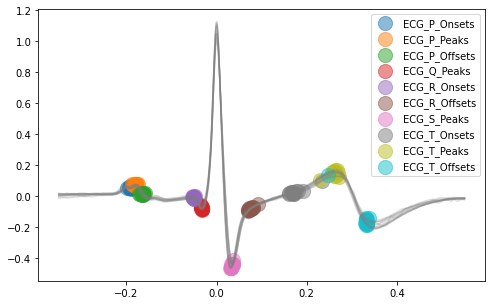

In [10]:
# Delineate the ECG signal
signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=3000, method="cwt", show=True, show_type='all')

By specifying *'all'* in the `show_type` argument, you can plot all delineated information output by the cwt method. However, it could be hard to evaluate the accuracy of the delineated information with everyhing plotted together. Let's tease them apart!

/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(buffer, ignore_index=True, sort=False)
/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = buffer.append(data, ignore_index=True, sort=False)


count     50000.000000
unique     4598.000000
top           0.010681
freq        573.000000
Name: Signal, dtype: float64
{'epoch': count     2802.000000
unique    1263.000000
top          0.003204
freq        52.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1316.000000
top          0.010681
freq        93.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1299.000000
top          0.008087
freq        54.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1233.000000
top          0.013123
freq        68.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1300.000000
top          0.015564
freq        59.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1352.000000
top          0.013123
freq        44.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1218.000000
top          0.005646
freq        32.000000
Name: Signal,

/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(buffer, ignore_index=True, sort=False)
/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = buffer.append(data, ignore_index=True, sort=False)


count     50000.000000
unique     4598.000000
top           0.010681
freq        573.000000
Name: Signal, dtype: float64
{'epoch': count     2700.000000
unique    1260.000000
top          0.003204
freq        52.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1310.000000
top          0.010681
freq        81.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1299.000000
top          0.010681
freq        43.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1226.000000
top          0.013123
freq        65.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1295.000000
top          0.015564
freq        56.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1348.000000
top          0.013123
freq        44.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1206.000000
top          0.005646
freq        32.000000
Name: Signal,

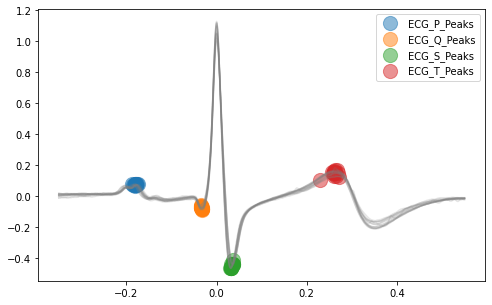

In [11]:
# Visualize P-peaks and T-peaks
signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=3000, method="cwt", show=True, show_type='peaks')

/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(buffer, ignore_index=True, sort=False)
/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = buffer.append(data, ignore_index=True, sort=False)


count     50000.000000
unique     4598.000000
top           0.010681
freq        573.000000
Name: Signal, dtype: float64
{'epoch': count     2802.000000
unique    1263.000000
top          0.003204
freq        52.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1316.000000
top          0.010681
freq        93.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1299.000000
top          0.008087
freq        54.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1233.000000
top          0.013123
freq        68.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1300.000000
top          0.015564
freq        59.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1352.000000
top          0.013123
freq        44.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1218.000000
top          0.005646
freq        32.000000
Name: Signal,

/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(buffer, ignore_index=True, sort=False)
/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = buffer.append(data, ignore_index=True, sort=False)


count     50000.000000
unique     4598.000000
top           0.010681
freq        573.000000
Name: Signal, dtype: float64
{'epoch': count     2700.000000
unique    1260.000000
top          0.003204
freq        52.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1310.000000
top          0.010681
freq        81.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1299.000000
top          0.010681
freq        43.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1226.000000
top          0.013123
freq        65.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1295.000000
top          0.015564
freq        56.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1348.000000
top          0.013123
freq        44.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1206.000000
top          0.005646
freq        32.000000
Name: Signal,

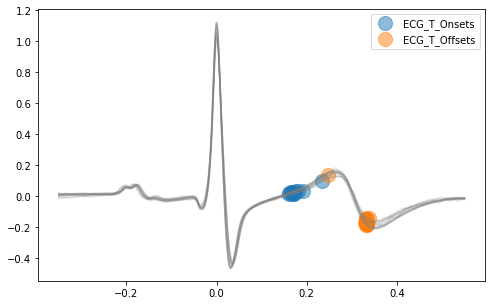

In [12]:
# Visualize T-waves boundaries
signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=3000, method="cwt", show=True, show_type='bounds_T')

/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(buffer, ignore_index=True, sort=False)
/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = buffer.append(data, ignore_index=True, sort=False)


count     50000.000000
unique     4598.000000
top           0.010681
freq        573.000000
Name: Signal, dtype: float64
{'epoch': count     2802.000000
unique    1263.000000
top          0.003204
freq        52.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1316.000000
top          0.010681
freq        93.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1299.000000
top          0.008087
freq        54.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1233.000000
top          0.013123
freq        68.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1300.000000
top          0.015564
freq        59.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1352.000000
top          0.013123
freq        44.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1218.000000
top          0.005646
freq        32.000000
Name: Signal,

/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(buffer, ignore_index=True, sort=False)
/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = buffer.append(data, ignore_index=True, sort=False)


count     50000.000000
unique     4598.000000
top           0.010681
freq        573.000000
Name: Signal, dtype: float64
{'epoch': count     2700.000000
unique    1260.000000
top          0.003204
freq        52.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1310.000000
top          0.010681
freq        81.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1299.000000
top          0.010681
freq        43.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1226.000000
top          0.013123
freq        65.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1295.000000
top          0.015564
freq        56.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1348.000000
top          0.013123
freq        44.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1206.000000
top          0.005646
freq        32.000000
Name: Signal,

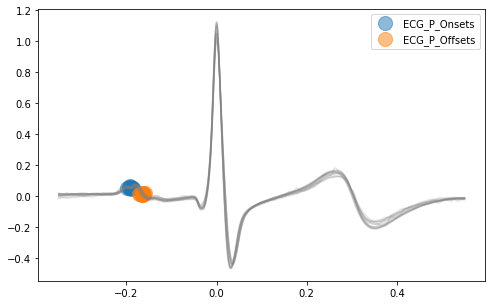

In [13]:
# Visualize P-waves boundaries
signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=3000, method="cwt", show=True, show_type='bounds_P')

/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(buffer, ignore_index=True, sort=False)
/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = buffer.append(data, ignore_index=True, sort=False)


count     50000.000000
unique     4598.000000
top           0.010681
freq        573.000000
Name: Signal, dtype: float64
{'epoch': count     2802.000000
unique    1263.000000
top          0.003204
freq        52.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1316.000000
top          0.010681
freq        93.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1299.000000
top          0.008087
freq        54.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1233.000000
top          0.013123
freq        68.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1300.000000
top          0.015564
freq        59.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1352.000000
top          0.013123
freq        44.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1218.000000
top          0.005646
freq        32.000000
Name: Signal,

/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(buffer, ignore_index=True, sort=False)
/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = buffer.append(data, ignore_index=True, sort=False)


count     50000.000000
unique     4598.000000
top           0.010681
freq        573.000000
Name: Signal, dtype: float64
{'epoch': count     2700.000000
unique    1260.000000
top          0.003204
freq        52.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1310.000000
top          0.010681
freq        81.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1299.000000
top          0.010681
freq        43.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1226.000000
top          0.013123
freq        65.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1295.000000
top          0.015564
freq        56.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1348.000000
top          0.013123
freq        44.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1206.000000
top          0.005646
freq        32.000000
Name: Signal,

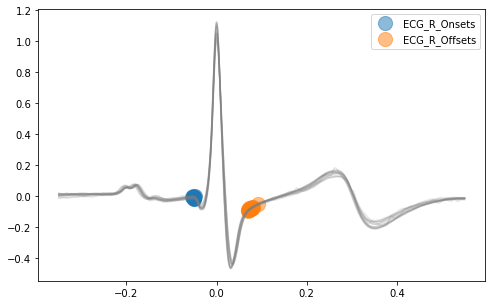

In [14]:
# Visualize R-waves boundaries
signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=3000, method="cwt", show=True, show_type='bounds_R')

*Unlike the peak method, the continuous wavelet method does not idenfity the Q-peaks and S-peaks. However, it provides more information regarding the boundaries of the waves*

Visually, except a few exception, CWT method is doing a great job. However, the P-waves boundaries are not very clearly identified here.

Last but not least, we will look at the third method in Neurokit [ecg_delineate()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.ecg_delineate>) function: the discrete wavelet method. 

### Discrete Wavelet Method (DWT) - default method

In [15]:

# print(ecg_signal.index)
# print(ecg_signal[0])
# ecg_signal = pd.to_numeric(ecg_signal)
nk.ecg_segment(ecg_signal, rpeaks=rpeaks['ECG_R_Peaks'], sampling_rate=3000, show=False)['1']["Signal"]

count     50000.000000
unique     4598.000000
top           0.010681
freq        573.000000
Name: Signal, dtype: float64
{'epoch': count     2802.000000
unique    1263.000000
top          0.003204
freq        52.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1316.000000
top          0.010681
freq        93.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1299.000000
top          0.008087
freq        54.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1233.000000
top          0.013123
freq        68.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1300.000000
top          0.015564
freq        59.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1352.000000
top          0.013123
freq        44.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1218.000000
top          0.005646
freq        32.000000
Name: Signal,

/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(buffer, ignore_index=True, sort=False)
/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = buffer.append(data, ignore_index=True, sort=False)


-0.384580    0.000763
-0.384247    0.000763
-0.383914    0.001068
-0.383580    0.000763
-0.383247    0.000763
               ...   
 0.548067   -0.018616
 0.548400   -0.018463
 0.548734   -0.018768
 0.549067   -0.018921
 0.549401   -0.018768
Name: Signal, Length: 2802, dtype: float64

boom
<class 'numpy.float64'>
count     50000.000000
unique     4598.000000
top           0.010681
freq        573.000000
Name: Signal, dtype: float64
{'epoch': count     2802.000000
unique    1263.000000
top          0.003204
freq        52.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1316.000000
top          0.010681
freq        93.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1299.000000
top          0.008087
freq        54.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1233.000000
top          0.013123
freq        68.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1300.000000
top          0.015564
freq        59.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1352.000000
top          0.013123
freq        44.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1218.000000
top          0.005646
freq  

/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(buffer, ignore_index=True, sort=False)
/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = buffer.append(data, ignore_index=True, sort=False)


<class 'numpy.float64'>
<class 'numpy.float64'>
count    1154.000000
mean        0.026834
std         0.142607
min        -0.089874
25%        -0.021362
50%         0.010834
75%         0.016747
max         1.064453
Name: Signal, dtype: float64
<class 'numpy.float64'>
<class 'numpy.float64'>
count    1154.000000
mean        0.035833
std         0.139175
min        -0.072784
25%        -0.004539
50%         0.015564
75%         0.018158
max         1.052704
Name: Signal, dtype: float64
<class 'numpy.float64'>
<class 'numpy.float64'>
count    1154.000000
mean        0.028989
std         0.151660
min        -0.077820
25%        -0.023804
50%         0.008087
75%         0.015259
max         1.120758
Name: Signal, dtype: float64
<class 'numpy.float64'>
<class 'numpy.float64'>
count    1154.000000
mean        0.028055
std         0.135102
min        -0.084991
25%        -0.011749
50%         0.005569
75%         0.015564
max         1.016998
Name: Signal, dtype: float64
<class 'numpy.float6

/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(buffer, ignore_index=True, sort=False)
/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = buffer.append(data, ignore_index=True, sort=False)


count     50000.000000
unique     4598.000000
top           0.010681
freq        573.000000
Name: Signal, dtype: float64
{'epoch': count     2700.000000
unique    1260.000000
top          0.003204
freq        52.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1310.000000
top          0.010681
freq        81.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1299.000000
top          0.010681
freq        43.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1226.000000
top          0.013123
freq        65.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1295.000000
top          0.015564
freq        56.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1348.000000
top          0.013123
freq        44.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1206.000000
top          0.005646
freq        32.000000
Name: Signal,

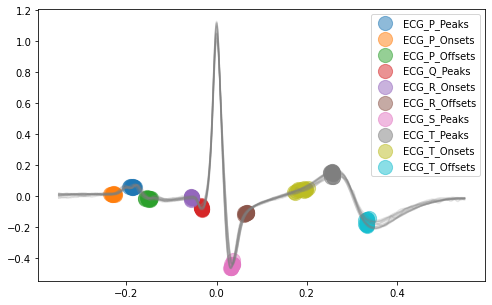

In [16]:
# Delineate the ECG signal
ecg_signal = pd.to_numeric(ecg_signal)
print("boom")
print(type(ecg_signal[0]))
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=3000, method="dwt", show=True, show_type='all')

In [17]:
type(rpeaks['ECG_R_Peaks'])


numpy.ndarray

/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(buffer, ignore_index=True, sort=False)
/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = buffer.append(data, ignore_index=True, sort=False)


count     50000.000000
unique     4598.000000
top           0.010681
freq        573.000000
Name: Signal, dtype: float64
{'epoch': count     2802.000000
unique    1263.000000
top          0.003204
freq        52.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1316.000000
top          0.010681
freq        93.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1299.000000
top          0.008087
freq        54.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1233.000000
top          0.013123
freq        68.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1300.000000
top          0.015564
freq        59.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1352.000000
top          0.013123
freq        44.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1218.000000
top          0.005646
freq        32.000000
Name: Signal,

/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(buffer, ignore_index=True, sort=False)
/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = buffer.append(data, ignore_index=True, sort=False)


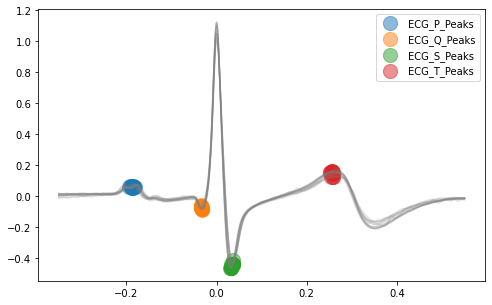

In [18]:
# Visualize P-peaks and T-peaks
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=3000, method="dwt", show=True, show_type='peaks')

/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(buffer, ignore_index=True, sort=False)
/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = buffer.append(data, ignore_index=True, sort=False)


count     50000.000000
unique     4598.000000
top           0.010681
freq        573.000000
Name: Signal, dtype: float64
{'epoch': count     2802.000000
unique    1263.000000
top          0.003204
freq        52.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1316.000000
top          0.010681
freq        93.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1299.000000
top          0.008087
freq        54.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1233.000000
top          0.013123
freq        68.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1300.000000
top          0.015564
freq        59.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1352.000000
top          0.013123
freq        44.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1218.000000
top          0.005646
freq        32.000000
Name: Signal,

/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(buffer, ignore_index=True, sort=False)
/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = buffer.append(data, ignore_index=True, sort=False)


count     50000.000000
unique     4598.000000
top           0.010681
freq        573.000000
Name: Signal, dtype: float64
{'epoch': count     2700.000000
unique    1260.000000
top          0.003204
freq        52.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1310.000000
top          0.010681
freq        81.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1299.000000
top          0.010681
freq        43.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1226.000000
top          0.013123
freq        65.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1295.000000
top          0.015564
freq        56.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1348.000000
top          0.013123
freq        44.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1206.000000
top          0.005646
freq        32.000000
Name: Signal,

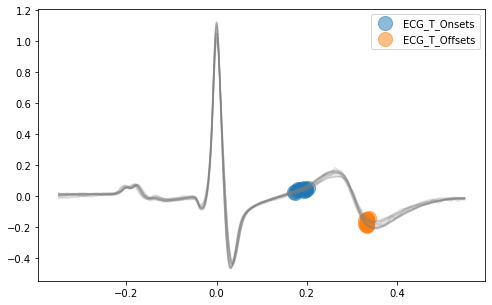

In [19]:
# visualize T-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=3000, method="dwt", show=True, show_type='bounds_T')

/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(buffer, ignore_index=True, sort=False)
/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = buffer.append(data, ignore_index=True, sort=False)


count     50000.000000
unique     4598.000000
top           0.010681
freq        573.000000
Name: Signal, dtype: float64
{'epoch': count     2802.000000
unique    1263.000000
top          0.003204
freq        52.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1316.000000
top          0.010681
freq        93.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1299.000000
top          0.008087
freq        54.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1233.000000
top          0.013123
freq        68.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1300.000000
top          0.015564
freq        59.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1352.000000
top          0.013123
freq        44.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1218.000000
top          0.005646
freq        32.000000
Name: Signal,

/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(buffer, ignore_index=True, sort=False)
/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = buffer.append(data, ignore_index=True, sort=False)


count     50000.000000
unique     4598.000000
top           0.010681
freq        573.000000
Name: Signal, dtype: float64
{'epoch': count     2700.000000
unique    1260.000000
top          0.003204
freq        52.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1310.000000
top          0.010681
freq        81.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1299.000000
top          0.010681
freq        43.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1226.000000
top          0.013123
freq        65.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1295.000000
top          0.015564
freq        56.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1348.000000
top          0.013123
freq        44.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1206.000000
top          0.005646
freq        32.000000
Name: Signal,

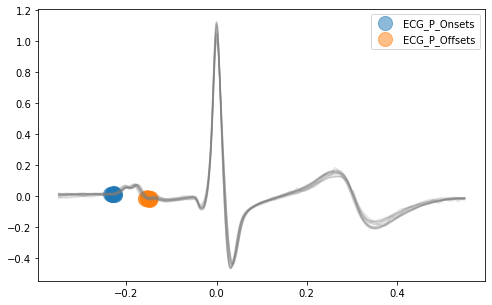

In [20]:
# Visualize P-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=3000, method="dwt", show=True, show_type='bounds_P')

/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(buffer, ignore_index=True, sort=False)
/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = buffer.append(data, ignore_index=True, sort=False)


count     50000.000000
unique     4598.000000
top           0.010681
freq        573.000000
Name: Signal, dtype: float64
{'epoch': count     2802.000000
unique    1263.000000
top          0.003204
freq        52.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1316.000000
top          0.010681
freq        93.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1299.000000
top          0.008087
freq        54.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1233.000000
top          0.013123
freq        68.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1300.000000
top          0.015564
freq        59.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1352.000000
top          0.013123
freq        44.000000
Name: Signal, dtype: float64}
{'epoch': count     2802.000000
unique    1218.000000
top          0.005646
freq        32.000000
Name: Signal,

/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(buffer, ignore_index=True, sort=False)
/Users/opsb/Projects/neurokit_examples/.venv/lib/python3.10/site-packages/neurokit2/epochs/epochs_create.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = buffer.append(data, ignore_index=True, sort=False)


count     50000.000000
unique     4598.000000
top           0.010681
freq        573.000000
Name: Signal, dtype: float64
{'epoch': count     2700.000000
unique    1260.000000
top          0.003204
freq        52.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1310.000000
top          0.010681
freq        81.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1299.000000
top          0.010681
freq        43.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1226.000000
top          0.013123
freq        65.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1295.000000
top          0.015564
freq        56.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1348.000000
top          0.013123
freq        44.000000
Name: Signal, dtype: float64}
{'epoch': count     2700.000000
unique    1206.000000
top          0.005646
freq        32.000000
Name: Signal,

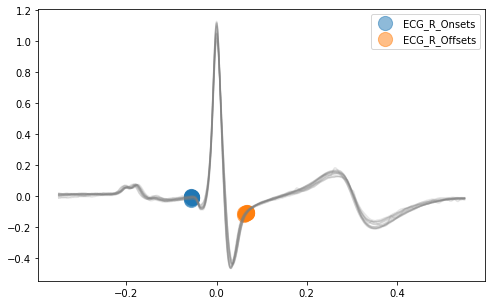

In [21]:
# Visualize R-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=3000, method="dwt", show=True, show_type='bounds_R')

Visually, from the plots above, the delineated outputs of DWT appear to be more accurate than CWT, especially for the P-peaks and P-wave boundaries.

Overall, for this signal, the peak and DWT methods seem to be superior to the CWT.